# Problem 1 - Answers

Consider a 2D triangle lattice with basis vectors $\mathbf{a}_1 = (a, 0)$ and $\mathbf{a}_2 = (1/2, \sqrt{3}/2)a$.
1. Calculate the reciprocal lattice vectors for this lattice. Plot the lattice in real space and reciprocal space.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
a = 1  # Take a=1 we will work in units of a so this is arbitrary
a1 = np.array([a, 0, 0])
a2 = np.array([0.5 * a, np.sqrt(3)/2 * a, 0])
a3 = np.array([0, 0, 1])

denominator = np.dot(a1, np.cross(a2, a3))
b1 = 2*np.pi * (np.cross(a2, a3))/denominator
b2 = 2*np.pi * (np.cross(a3, a1))/denominator
b3 = 2*np.pi * (np.cross(a1, a1))/denominator

print(a1, a2, a3)
print(b1, b2, b3)

[1 0 0] [0.5       0.8660254 0.       ] [0 0 1]
[ 6.28318531 -3.62759873  0.        ] [0.         7.25519746 0.        ] [0. 0. 0.]


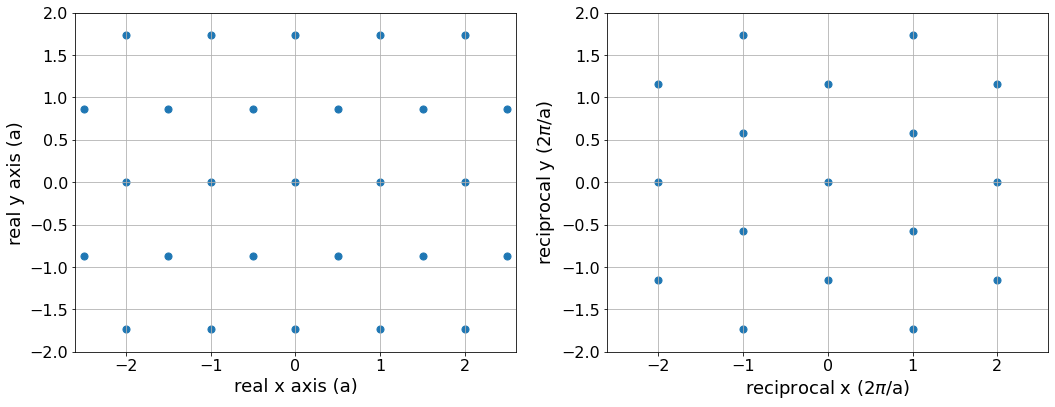

In [3]:
lattice_size = 10
axis_size = 2

# Construct the lattice by running through every combination of lattice vectors in x and y
combinations = np.array(np.meshgrid(range(-lattice_size, lattice_size), range(-lattice_size, lattice_size))).reshape(2, -1)
real_lattice = np.empty_like(combinations, dtype=float)
recip_lattice = np.empty_like(combinations, dtype=float)
for i in range(np.shape(real_lattice)[-1]):
    real_lattice[:,i] = combinations[0,i] * a1[0:2] + combinations[1,i] * a2[0:2]
    recip_lattice[:,i] = combinations[0,i] * b1[0:2] + combinations[1,i] * b2[0:2]

params = {
'axes.labelsize': 18,
'font.size': 18,
'legend.fontsize': 18,
'xtick.labelsize': 16,
'ytick.labelsize': 16,
'figure.figsize': [15, 6] 
}
plt.rcParams.update(params)
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2)
ax1.scatter(real_lattice[0,:], real_lattice[1,:], s=50)
ax1.axis('equal')
ax1.grid()
ax1.set(xlim=[-axis_size*a, axis_size*a], ylim=[-axis_size*a, axis_size*a],
        xlabel = "real x axis (a)",
        ylabel = "real y axis (a)")

ax2.scatter(recip_lattice[0,:] / (2*np.pi/a), recip_lattice[1,:] / (2*np.pi/a), s=50)
ax2.axis('equal')
ax2.grid()
ax2.set(xlim=[-axis_size*a, axis_size*a], ylim=[-axis_size*a, axis_size*a],
        xlabel = "reciprocal x (2$\pi$/a)",
        ylabel = "reciprocal y (2$\pi$/a)")

fig.tight_layout()

plt.show()

2. Consider a photon incident on the lattice with wavevector $\mathbf{k}_{in} = [0, 4\pi/\sqrt{3}a]$. Find the possible outgoing wavevectors for elastic scattering of the photon from this lattice and plot them on the reciprocal lattice.

$\mathbf{k}_{out}$ can be found using

$$ \mathbf{k}_{out} = \mathbf{k}_{in} + \mathbf{G}, $$

where $\mathbf{G}$ is any reciprocal lattice vector

$$ 2\mathbf{k}_{in} \cdot \mathbf{G} + \mathbf{G}^2 = 0.$$

So we need to loop through all reciprocal lattice vectors and test this condition.

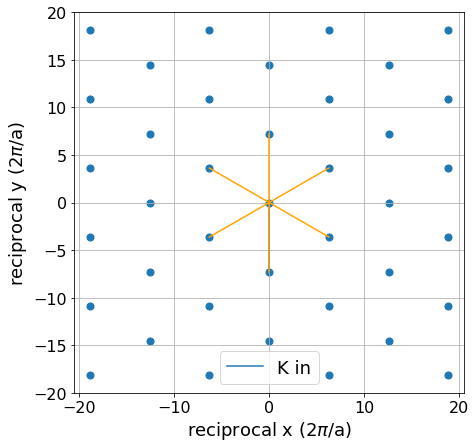

In [4]:
k_in = np.array([0, 4*np.pi/(np.sqrt(3)*a)])
axis_size = 20

k_out = []
for i in range(np.shape(recip_lattice)[-1]):
    G = recip_lattice[:,i]
    product = np.dot(2*k_in, G)
    G_square = np.dot(G, G)
    if product + G_square == 0:
        k_out_temp = k_in + G
        k_out.append(k_out_temp)

# PLot reciprocal lattice
params = {
'figure.figsize': [7, 7] 
}
plt.rcParams.update(params)
fig3, ax3 = plt.subplots(nrows=1, ncols=1)
ax3.scatter(recip_lattice[0,:], recip_lattice[1,:], s=50)
ax3.axis('equal')
ax3.grid()
ax3.set(xlim=[-axis_size*a, axis_size*a], ylim=[-axis_size*a, axis_size*a],
        xlabel = "reciprocal x (2$\pi$/a)",
        ylabel = "reciprocal y (2$\pi$/a)")
fig.tight_layout()

# Plot k_in and k_out
ax3.plot([0, -k_in[0]], [0, -k_in[1]], label="K in")  # K-in must end at a lattice point
for k in k_out:
    ax3.plot([0, -k[0]], [0, -k[1]], color="orange")
ax3.legend()

plt.show()